<a href="https://www.kaggle.com/code/leonardoterra/eda-amz-prime-users?scriptVersionId=217833849" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**Dataset**
--

# **Amazon Prime Users Dataset**
    Data Science EDA
    
## **Data Description**
This analysis is based on a dataset extracted from Kaggle.com. This dataset presents user data collected from Amazon Prime services related to purchases, genres, type of subscription, engagement metrics and else. The goal of this analysis is to evaluate the collected data to gain more knowledge about the type of engagement these users have with the service. This is a simple but effective analysis, capable of extracting some statistic infomation with precision.

## **Import Libraries**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
# To avoid warnings        
import warnings 
warnings.filterwarnings('ignore')

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-prime-userbase-dataset/amazon_prime_users.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# **EDA & Visualizations**

## **Organizing Dataset**

In [3]:
df = pd.read_csv('/kaggle/input/amazon-prime-userbase-dataset/amazon_prime_users.csv')

In [4]:
df

,User ID,Name,Email Address,Username,Date of Birth,Gender,Location,Membership Start Date,Membership End Date,Subscription Plan,Payment Information,Renewal Status,Usage Frequency,Purchase History,Favorite Genres,Devices Used,Engagement Metrics,Feedback/Ratings,Customer Support Interactions
0,1,Ronald Murphy,williamholland@example.com,williamholland,1953-06-03,Male,Rebeccachester,2024-01-15,2025-01-14,Annual,Mastercard,Manual,Regular,Electronics,Documentary,Smart TV,Medium,3.6,3
1,2,Scott Allen,scott22@example.org,scott22,1978-07-08,Male,Mcphersonview,2024-01-07,2025-01-06,Monthly,Visa,Manual,Regular,Electronics,Horror,Smartphone,Medium,3.8,7
2,3,Jonathan Parrish,brooke16@example.org,brooke16,1994-12-06,Female,Youngfort,2024-04-13,2025-04-13,Monthly,Mastercard,Manual,Regular,Books,Comedy,Smart TV,Low,3.3,8
3,4,Megan Williams,elizabeth31@example.net,elizabeth31,1964-12-22,Female,Feliciashire,2024-01-24,2025-01-23,Monthly,Amex,Auto-renew,Regular,Electronics,Documentary,Smart TV,High,3.3,7
4,5,Kathryn Brown,pattersonalexandra@example.org,pattersonalexandra,1961-06-04,Male,Port Deborah,2024-02-14,2025-02-13,Annual,Visa,Auto-renew,Frequent,Clothing,Drama,Smart TV,Low,4.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,Michael Lopez,williamsroberto@example.org,williamsroberto,1967-08-19,Male,Smithport,2024-01-25,2025-01-24,Annual,Visa,Auto-renew,Frequent,Electronics,Comedy,Smartphone,Medium,4.9,2
2496,2497,Matthew Woodard,lkaiser@example.com,lkaiser,1980-10-23,Male,Ethanport,2024-03-03,2025-03-03,Annual,Amex,Manual,Frequent,Books,Comedy,Smart TV,Medium,4.0,0
2497,2498,Morgan Barnes,erikaholland@example.net,erikaholland,1972-03-31,Female,Alexandraborough,2024-02-09,2025-02-08,Annual,Visa,Manual,Frequent,Electronics,Documentary,Tablet,Low,4.9,8
2498,2499,Gina Castaneda,reedcourtney@example.net,reedcourtney,1965-08-02,Female,Williammouth,2024-02-18,2025-02-17,Monthly,Visa,Manual,Regular,Clothing,Comedy,Smartphone,High,3.4,7


In [5]:
df.shape

(2500, 19)

In [6]:
df.dtypes

User ID                            int64
Name                              object
Email Address                     object
Username                          object
Date of Birth                     object
Gender                            object
Location                          object
Membership Start Date             object
Membership End Date               object
Subscription Plan                 object
Payment Information               object
Renewal Status                    object
Usage Frequency                   object
Purchase History                  object
Favorite Genres                   object
Devices Used                      object
Engagement Metrics                object
Feedback/Ratings                 float64
Customer Support Interactions      int64
dtype: object

In [7]:
columns_to_drop = [0,1,2,3,6,7,8,10,13]
df.drop(df.columns[columns_to_drop], axis =1, inplace = True)

In [8]:
df

,Date of Birth,Gender,Subscription Plan,Renewal Status,Usage Frequency,Favorite Genres,Devices Used,Engagement Metrics,Feedback/Ratings,Customer Support Interactions
0,1953-06-03,Male,Annual,Manual,Regular,Documentary,Smart TV,Medium,3.6,3
1,1978-07-08,Male,Monthly,Manual,Regular,Horror,Smartphone,Medium,3.8,7
2,1994-12-06,Female,Monthly,Manual,Regular,Comedy,Smart TV,Low,3.3,8
3,1964-12-22,Female,Monthly,Auto-renew,Regular,Documentary,Smart TV,High,3.3,7
4,1961-06-04,Male,Annual,Auto-renew,Frequent,Drama,Smart TV,Low,4.3,1
...,...,...,...,...,...,...,...,...,...,...
2495,1967-08-19,Male,Annual,Auto-renew,Frequent,Comedy,Smartphone,Medium,4.9,2
2496,1980-10-23,Male,Annual,Manual,Frequent,Comedy,Smart TV,Medium,4.0,0
2497,1972-03-31,Female,Annual,Manual,Frequent,Documentary,Tablet,Low,4.9,8
2498,1965-08-02,Female,Monthly,Manual,Regular,Comedy,Smartphone,High,3.4,7


In [9]:
df['Date of Birth'] = pd.to_datetime(df['Date of Birth'])

In [10]:
df.dtypes

Date of Birth                    datetime64[ns]
Gender                                   object
Subscription Plan                        object
Renewal Status                           object
Usage Frequency                          object
Favorite Genres                          object
Devices Used                             object
Engagement Metrics                       object
Feedback/Ratings                        float64
Customer Support Interactions             int64
dtype: object

In [11]:
from datetime import datetime as dt

df['Age'] = dt.today().year - df['Date of Birth'].dt.year
df.pop("Date of Birth")

0      1953-06-03
1      1978-07-08
2      1994-12-06
3      1964-12-22
4      1961-06-04
          ...    
2495   1967-08-19
2496   1980-10-23
2497   1972-03-31
2498   1965-08-02
2499   1972-11-13
Name: Date of Birth, Length: 2500, dtype: datetime64[ns]

In [12]:
usage_frequency = {
    'Occasional': 1,
    'Regular': 2,
    'Frequent': 3
}

engagement_metrics = {
    'Low': 1,
    'Medium': 2,
    'High': 3
}

df['Usage Frequency'] = df['Usage Frequency'].map(usage_frequency)

df['Engagement Metrics'] = df['Engagement Metrics'].map(engagement_metrics)

In [13]:
def label(row):
    if row <= 27:
        return "Gen Z"
    elif row >= 28 and row <= 43:
        return "Millennials"
    elif row >= 44 and row <= 49:
        return "Gen X"
    else:
        return 'Boomers'
    
df['Label'] = df['Age'].apply(label)

In [14]:
df

,Gender,Subscription Plan,Renewal Status,Usage Frequency,Favorite Genres,Devices Used,Engagement Metrics,Feedback/Ratings,Customer Support Interactions,Age,Label
0,Male,Annual,Manual,2,Documentary,Smart TV,2,3.6,3,72,Boomers
1,Male,Monthly,Manual,2,Horror,Smartphone,2,3.8,7,47,Gen X
2,Female,Monthly,Manual,2,Comedy,Smart TV,1,3.3,8,31,Millennials
3,Female,Monthly,Auto-renew,2,Documentary,Smart TV,3,3.3,7,61,Boomers
4,Male,Annual,Auto-renew,3,Drama,Smart TV,1,4.3,1,64,Boomers
...,...,...,...,...,...,...,...,...,...,...,...
2495,Male,Annual,Auto-renew,3,Comedy,Smartphone,2,4.9,2,58,Boomers
2496,Male,Annual,Manual,3,Comedy,Smart TV,2,4.0,0,45,Gen X
2497,Female,Annual,Manual,3,Documentary,Tablet,1,4.9,8,53,Boomers
2498,Female,Monthly,Manual,2,Comedy,Smartphone,3,3.4,7,60,Boomers


## **Statistical Analysis**

In [15]:
for column in df.columns:
    num_distinct = len(df[column].unique())
    print(f"{column}: {num_distinct} distinct values")

Gender: 2 distinct values
Subscription Plan: 2 distinct values
Renewal Status: 2 distinct values
Usage Frequency: 3 distinct values
Favorite Genres: 7 distinct values
Devices Used: 3 distinct values
Engagement Metrics: 3 distinct values
Feedback/Ratings: 21 distinct values
Customer Support Interactions: 11 distinct values
Age: 74 distinct values
Label: 4 distinct values


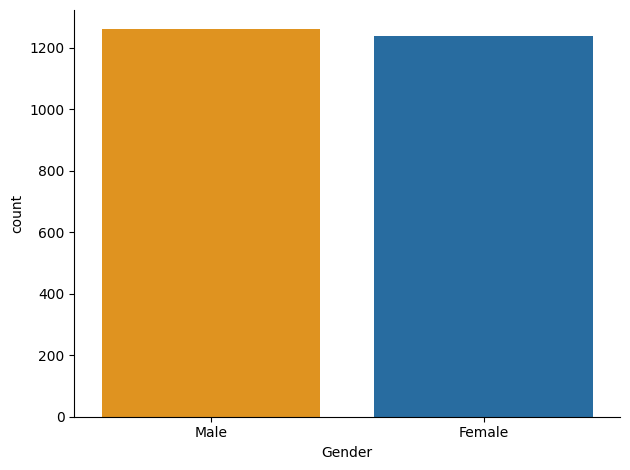

In [16]:
# Gender distribution

custom_colors = ['#ff9900','#146eb4','#000000', '#232f3e']
ax = sns.countplot(data=df, x='Gender', palette=custom_colors)
sns.despine(left=False, right=True, top=True, bottom=False)
plt.tight_layout()

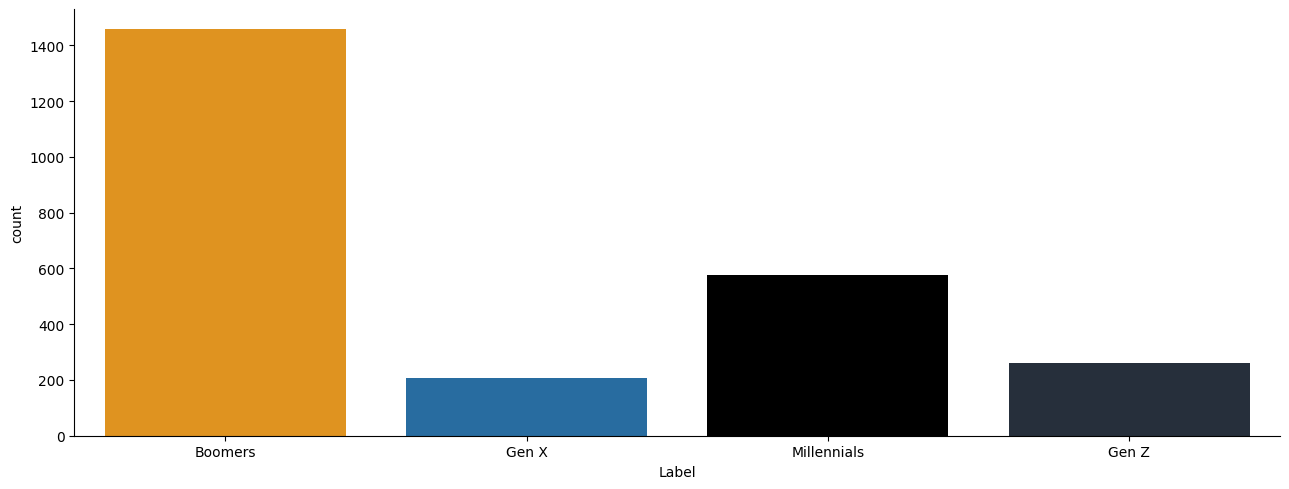

In [17]:
# Generation Distribution

custom_colors = ['#ff9900','#146eb4','#000000', '#232f3e']

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(13, 5))

ax = sns.countplot(data=df, x='Label', palette=custom_colors)

sns.despine(left=False, right=True, top=True, bottom=False)
plt.tight_layout()

In [18]:
# Generation Distribution %

print(df.groupby('Label')['Gender'].value_counts(normalize=True).round(4)*100)

Label        Gender
Boomers      Male      50.38
             Female    49.62
Gen X        Male      51.44
             Female    48.56
Gen Z        Male      51.35
             Female    48.65
Millennials  Female    50.35
             Male      49.65
Name: proportion, dtype: float64


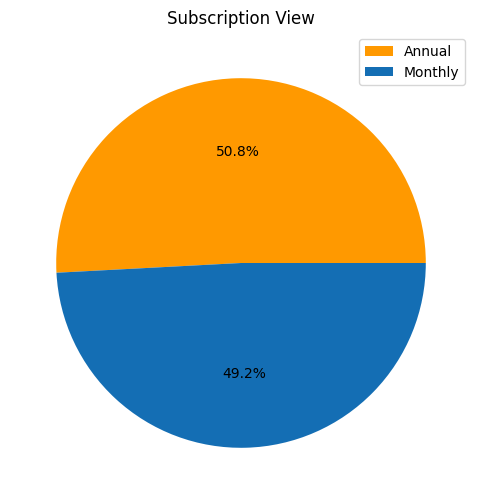

In [19]:
# Subscription plan %

custom_colors = ['#ff9900','#146eb4','#000000', '#232f3e']
purchased_catcount = df["Subscription Plan"].value_counts().values
fig, ax = plt.subplots(figsize=(7, 6))
ax.pie(x=df["Subscription Plan"].value_counts().values, autopct="%1.1f%%",colors=custom_colors)
plt.title("Subscription View", fontsize=12)
ax.legend(labels=["Annual", "Monthly"], loc="best");

In [20]:
# Subscription plan x Gender

print(df.groupby('Gender')['Subscription Plan'].value_counts(normalize=True).round(4)*100)

Gender  Subscription Plan
Female  Annual               50.08
        Monthly              49.92
Male    Annual               51.59
        Monthly              48.41
Name: proportion, dtype: float64


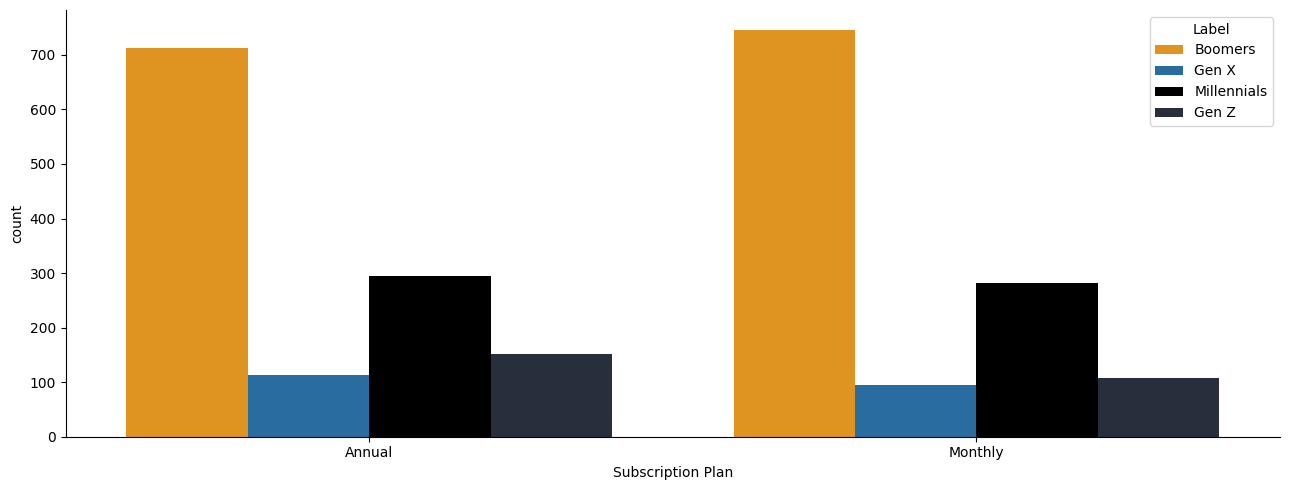

In [21]:
# Generation x Subscription Plan

custom_colors = ['#ff9900','#146eb4','#000000', '#232f3e']

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(13, 5))

ax = sns.countplot(data=df, x='Subscription Plan', palette=custom_colors, hue="Label")

sns.despine(left=False, right=True, top=True, bottom=False)
plt.tight_layout()

In [22]:
# Generation x Subscription Plan %

print(df.groupby('Label')['Subscription Plan'].value_counts(normalize=True).round(4)*100)

Label        Subscription Plan
Boomers      Monthly              51.13
             Annual               48.87
Gen X        Annual               54.33
             Monthly              45.67
Gen Z        Annual               58.69
             Monthly              41.31
Millennials  Annual               51.04
             Monthly              48.96
Name: proportion, dtype: float64


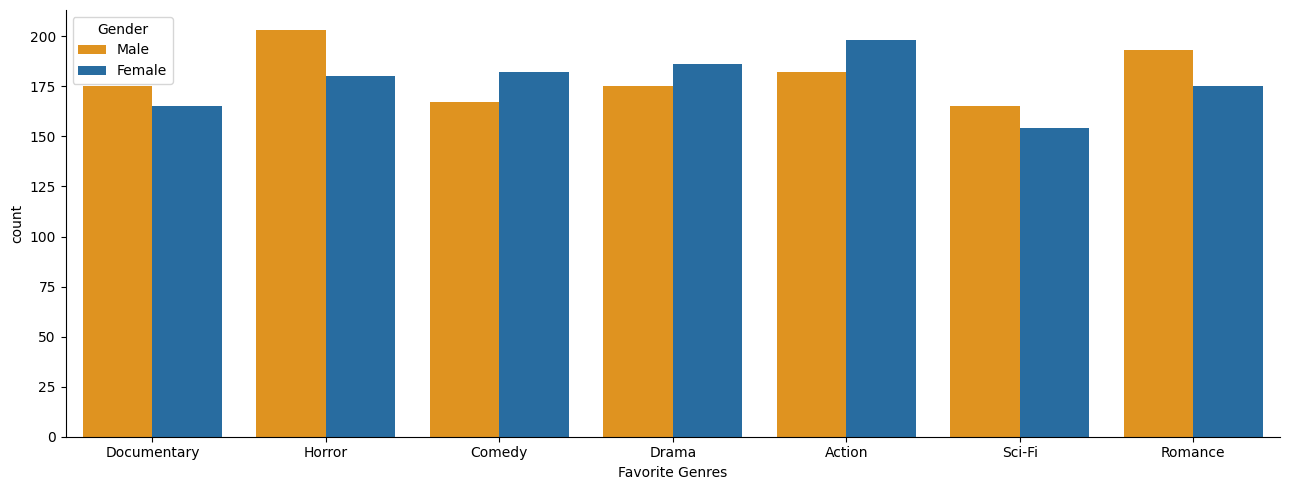

In [23]:
#Gender favorite genres distribution

custom_colors = ['#ff9900','#146eb4','#000000', '#232f3e']

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(13, 5))

ax = sns.countplot(data=df, x='Favorite Genres', palette=custom_colors, hue="Gender")

sns.despine(left=False, right=True, top=True, bottom=False)
plt.tight_layout()

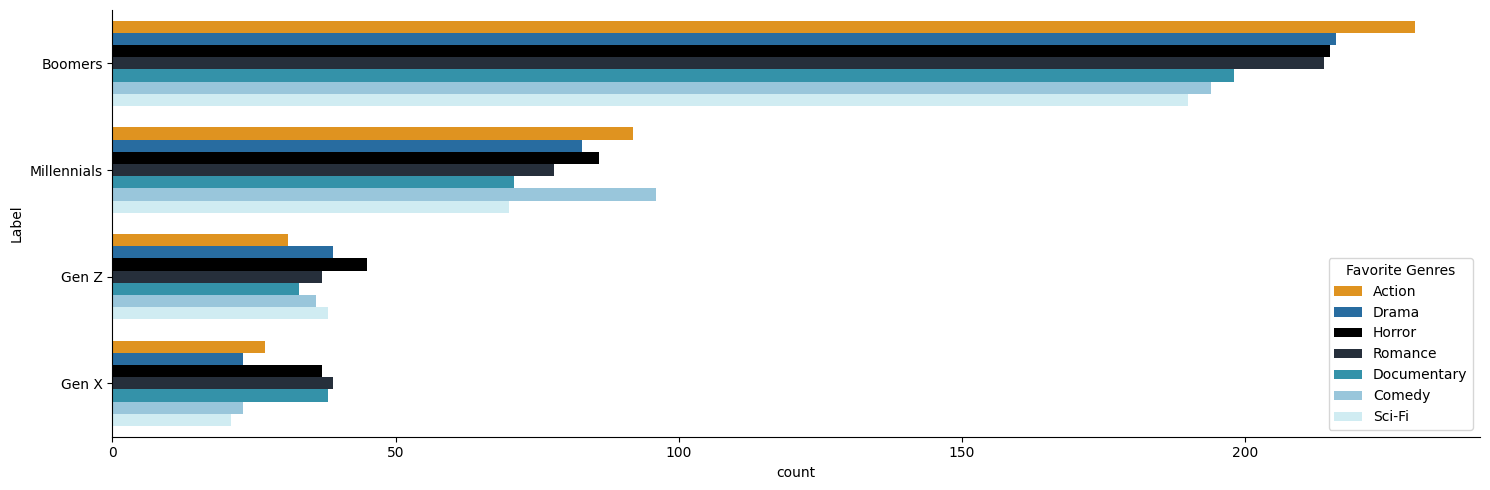

In [24]:
#Generation favorite genres distribution

films = df.groupby('Label')['Favorite Genres'].value_counts().sort_values(ascending=False)
sorted_films = films.reset_index()
sorted_films

custom_colors = ['#ff9900','#146eb4','#000000', '#232f3e','#219ebc','#8ecae6','#caf0f8']

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

ax = sns.barplot(data=sorted_films, x='count', y='Label', palette=custom_colors, hue="Favorite Genres", orient='h',)

sns.despine(left=False, right=True, top=True, bottom=False)
plt.tight_layout()

In [25]:
print(df.groupby('Gender')['Devices Used'].value_counts(normalize=True).round(4)*100)

Gender  Devices Used
Female  Smartphone      34.76
        Tablet          34.44
        Smart TV        30.81
Male    Smartphone      34.60
        Tablet          33.81
        Smart TV        31.59
Name: proportion, dtype: float64


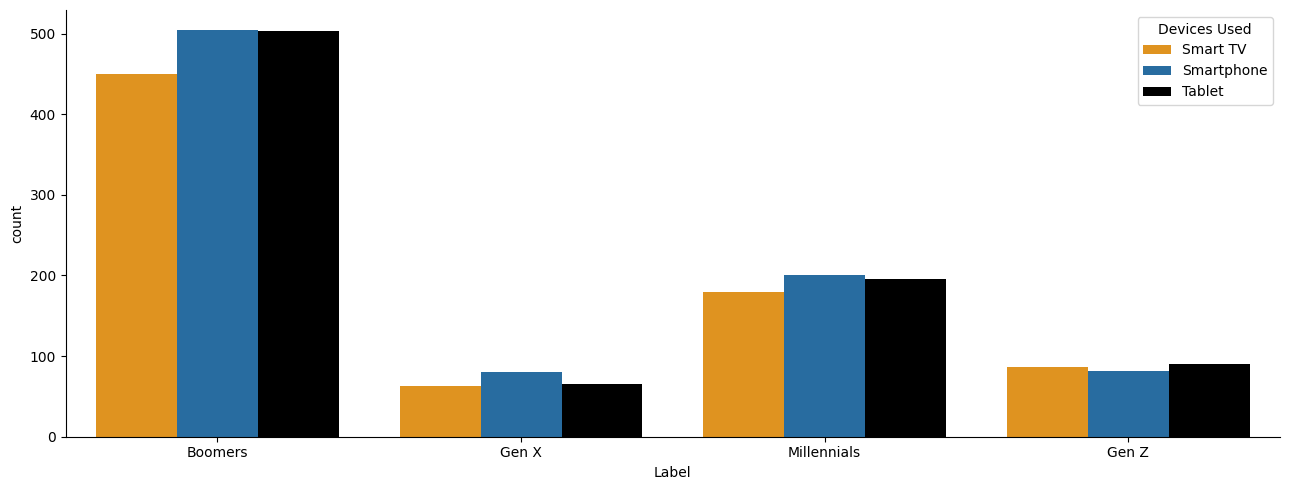

In [26]:
# Device use x Generation

custom_colors = ['#ff9900','#146eb4','#000000', '#232f3e']

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(13, 5))

ax = sns.countplot(data=df, x='Label', palette=custom_colors, hue="Devices Used")

sns.despine(left=False, right=True, top=True, bottom=False)
plt.tight_layout()

In [27]:
print(df.groupby('Label')['Devices Used'].value_counts(normalize=True).round(4)*100)

Label        Devices Used
Boomers      Smartphone      34.59
             Tablet          34.52
             Smart TV        30.89
Gen X        Smartphone      38.46
             Tablet          31.25
             Smart TV        30.29
Gen Z        Tablet          34.75
             Smart TV        33.59
             Smartphone      31.66
Millennials  Smartphone      34.90
             Tablet          33.85
             Smart TV        31.25
Name: proportion, dtype: float64


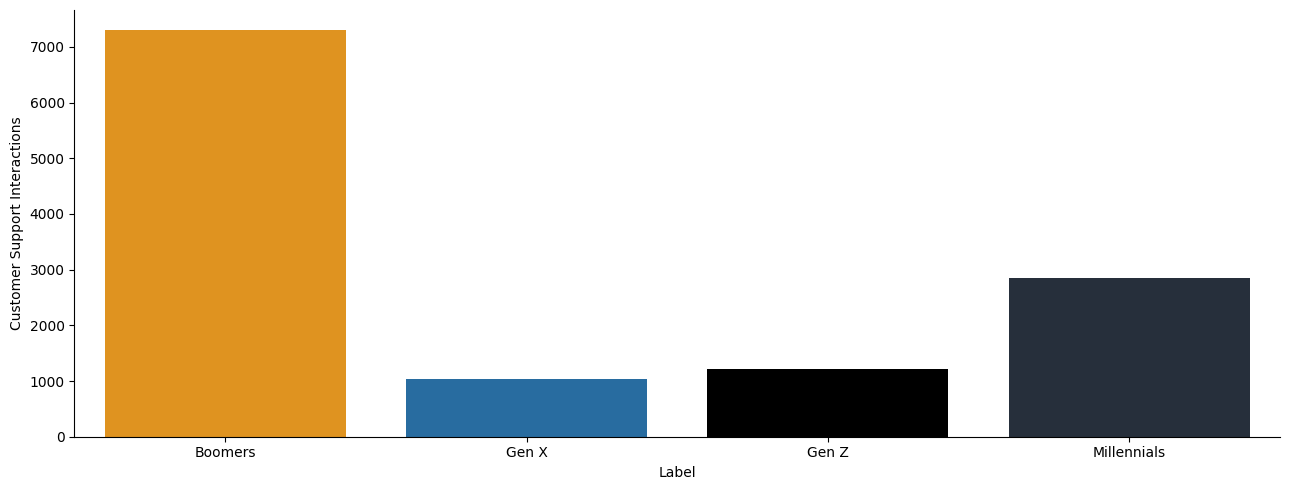

In [28]:
# Support interactions x Generation

grouped = df.groupby('Label')['Customer Support Interactions'].sum()
grouped_df = grouped.reset_index()

custom_colors = ['#ff9900','#146eb4','#000000', '#232f3e']

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(13, 5))

ax = sns.barplot(data=grouped_df, x='Label', y='Customer Support Interactions', palette=custom_colors)

sns.despine(left=False, right=True, top=True, bottom=False)
plt.tight_layout()

<Axes: >

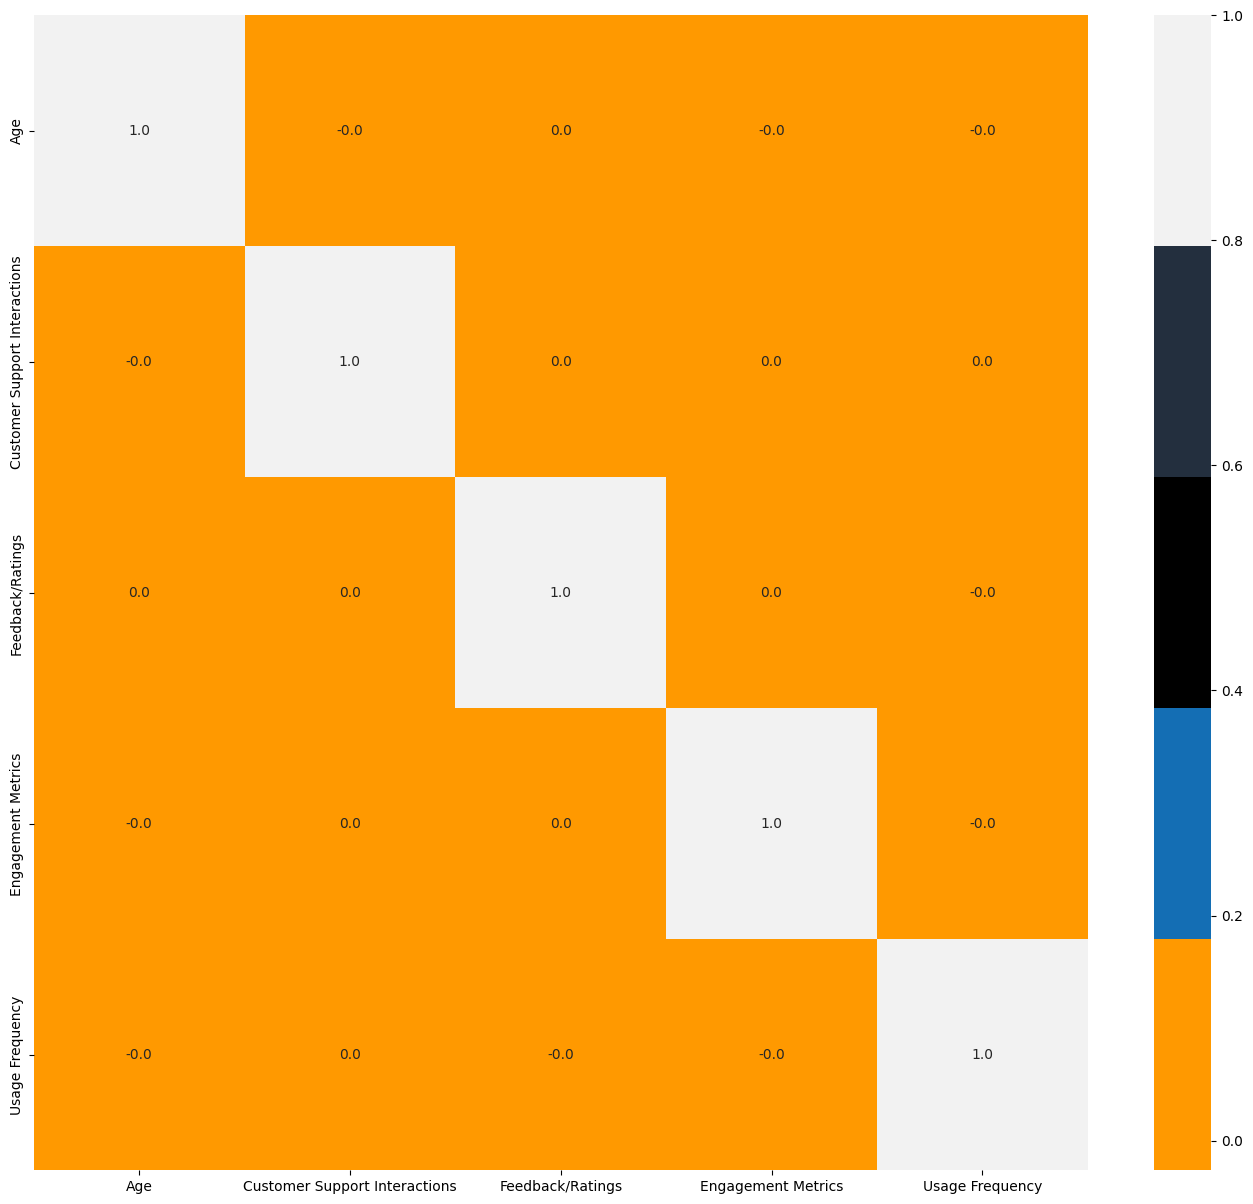

In [29]:
custom_colors = ['#ff9900','#146eb4','#000000', '#232f3e', '#f2f2f2']
correlation_matrix = df[['Age','Customer Support Interactions','Feedback/Ratings','Engagement Metrics','Usage Frequency']].corr()
plt.figure(figsize = (17, 15))
sns.heatmap(correlation_matrix, annot = True, fmt = ".1f",cmap=custom_colors)

## **Insights:**
--

### **Statistics**:
* The distribution of gender in the dataset is homogeneous.
* The dataset contains much more data on Boomers and Millenials. This can make the analysis biased torwards these two groups.

### **Age and Generation preferences**:
* Males favorite genres are Horror and Romance while Females prefer Action and Drama.
* Both Males and Females use their decives alike. Smart TVs lose to Smartphones (most used) and tablets.
* Males favorite genres are Horror and Romance while Females prefer Action and Drama.
* Each generation prefer to watch the following genres: Boomers - Action / Milleanials - Commedy / Gen X - Romance / Zoomers - Horror. A more detailed analysis dividing the data between males and females from all groups is required.

### **Device use & Engagement Metrics**:
* Males and females prefer to use their phones to gain access to prime features but the difference from other ways is not material.
* Gen X and Millenials prefer to use their phones to gain access while Boomers use Tablets and Zoomers Smart TVs but the difference is not material.

### **Conclusion:**
* There's no meaninful correlation between the main variables in this dataset. The data is very homogeneous and a more detailed analysis might be require to get more info. However it was good to draw some flat conclusions.
    
    Thanks for viewing it! 

### **Contact:**
* LinkedIn - linkedin.com/in/leonardo-terra-97b592124
* Portfolio - linktr.ee/leonardoterra